## Brief Introduction to Python - Recap

In [ ]:
# variables
my_num = 6
my_string = "ai is cool"
my_list = [1, 2, 3]

In [ ]:
# data types
type(my_num)

In [ ]:
# indexing
my_list[0] # python is zero-indexed

In [ ]:
# functions - allow segments of code to be reusable procedures
def add_nums(num1, num2):
  print(num1 + num2)

In [ ]:
# calling the add_nums function
add_nums(3, 7)

## Calling Functions from Libraries

In [ ]:
import numpy as np

In [ ]:
normal_array = [0, 1, 2, 3]

In [ ]:
type(test_array)

In [ ]:
numpy_array = np.array(test_array) # numpy arrays can be manipulated by hundreds of other functions within numpy library

In [ ]:
type(numpy_array)

## Importing Modules

In [ ]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

## Importing Our Data

In [ ]:
data = mnist.load_data()

In [ ]:
digits = np.concatenate((data[0][0], data[1][0]))
targets = np.concatenate((data[0][1], data[1][1]))

In [ ]:
plt.gray()
plt.matshow(# show the first item in digits);

## Splitting Up Our Data

In [ ]:
X = digits[:30000] # the neural network we'll use takes vectors as inputs; we need to flatten the images.
Y = targets[:30000]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # splitting up the data.

## Multi-Layer Perceptron

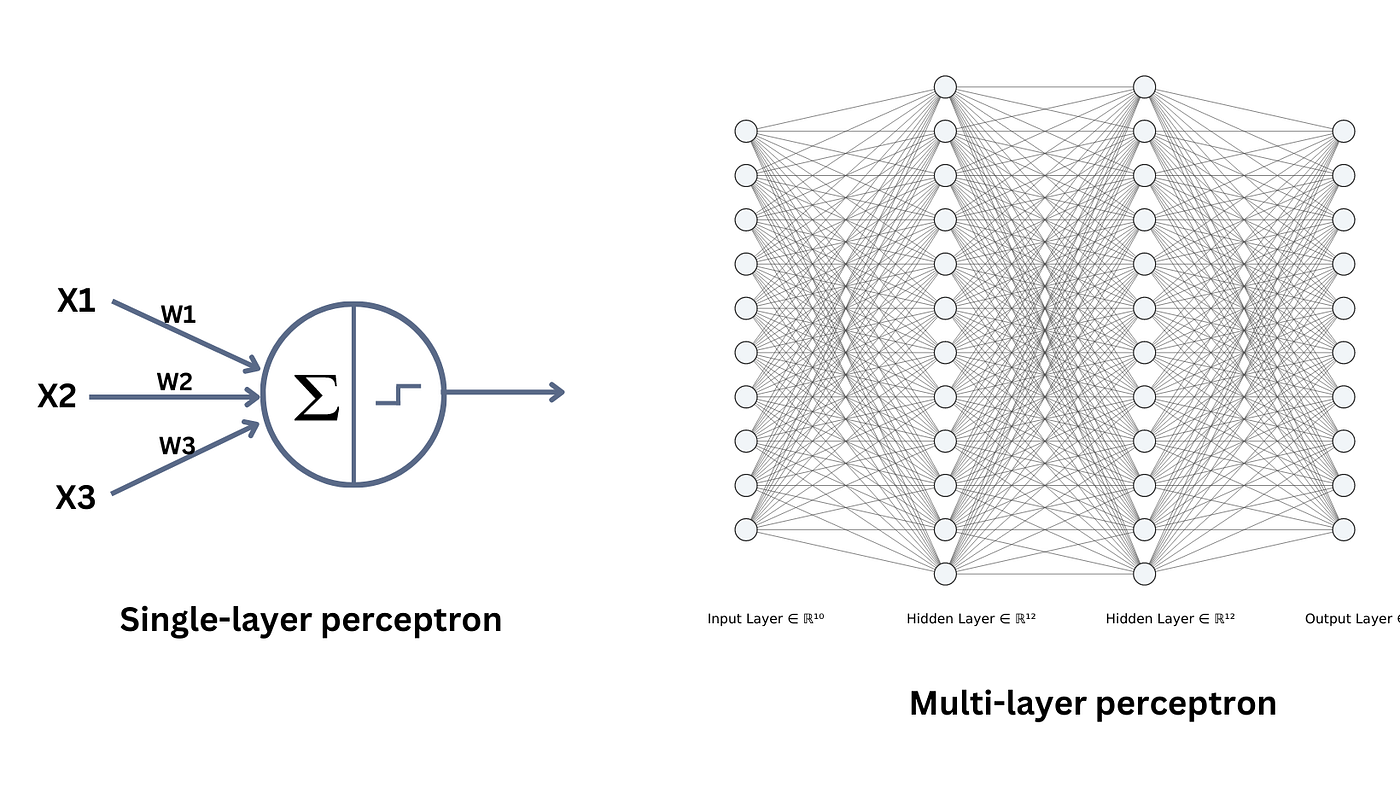

## Training Our Model

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, Y_train)

In [ ]:
clf.score(X_test, Y_test)

## Analyzing Model Output

In [ ]:
preds = clf.predict_proba(X_test[0].reshape(1, -1)) # adding an additional dimension is trivial.

In [ ]:
plt.matshow(X_test[0].reshape((28,28))) # displaying the image we are analyzing.

In [ ]:
fig, ax = plt.subplots()

ax.bar(np.arange(10), preds[0, :].tolist())

ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel("Probability")
ax.set_xlabel("Digit");

## Using Made-Up Data

In [ ]:
random_img = np.random.randint(1, 10, (28, 28))

plt.matshow(random_img);

In [ ]:
random_preds = clf.predict_proba(random_img.flatten().reshape(1, -1))

In [ ]:
fig, ax = plt.subplots()

ax.bar(np.arange(10), random_preds[0, :].tolist())

ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel("Probability")
ax.set_xlabel("Digit");

## Ignore This

In [ ]:
# Import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # Decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # Convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # Decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: {exact: "environment"}}});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # Get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # Get OpenCV format image
  img = js_to_image(data)
  # Grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # Save image
  cv2.imwrite(filename, img)

  return filename

## Take Picture

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))

except Exception as err:
  print(str(err))

## Giving the Model Real-Life Images

In [ ]:
image = cv2.imread(r"/content/photo.jpg")

grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

In [ ]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
preprocessed_digits = []

In [ ]:
for c in contours[0]:
    x,y,w,h = cv2.boundingRect(c)

    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]

    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))

    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)

In [ ]:
inp.shape

In [ ]:
for digit in inp:
    prediction = clf.predict(digit.reshape(1, 28 * 28))

    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()

    print ("\nPrediction from the neural network: {}".format(prediction))

    hard_maxed_prediction = np.zeros(prediction.shape)
    print ("\n\n---------------------------------------\n\n")